In [2]:
#The dataset consists of information having 10 year hospital readmission data by various measures of diagnosis

In [3]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [4]:
#Reading the csv file containing the US hospital data
df = pd.read_csv(r'C:\Users\utkar\Downloads\Foldfer for output\hospital.csv')

In [5]:
#type of dataframe
type(df)

pandas.core.frame.DataFrame

In [6]:
#check the first few data values in dataset
print(df.head())

       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 glucose_test A1Ctest change diabetes_med

In [7]:
#observing the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [8]:
#observing the summary statistics of dataframe to get a rough idea of value and its distribution
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [9]:
#check for unique age values
df['age'].unique()

array(['[70-80)', '[50-60)', '[60-70)', '[40-50)', '[80-90)', '[90-100)'],
      dtype=object)

In [10]:
df['age_category'] = df['age'].replace({'[70-80)':'late old','[60-70)':'very old','[40-50)':'early old',
                                     '[50-60)':'old', '[80-90)':'very late old','[90-100)':'extremely old' })

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [12]:
#dropping the age variable that was in the range values making it inconsistent in dataset
df.drop('age',axis=1,inplace=True)

In [13]:
#viewing summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   time_in_hospital   25000 non-null  int64 
 1   n_lab_procedures   25000 non-null  int64 
 2   n_procedures       25000 non-null  int64 
 3   n_medications      25000 non-null  int64 
 4   n_outpatient       25000 non-null  int64 
 5   n_inpatient        25000 non-null  int64 
 6   n_emergency        25000 non-null  int64 
 7   medical_specialty  25000 non-null  object
 8   diag_1             25000 non-null  object
 9   diag_2             25000 non-null  object
 10  diag_3             25000 non-null  object
 11  glucose_test       25000 non-null  object
 12  A1Ctest            25000 non-null  object
 13  change             25000 non-null  object
 14  diabetes_med       25000 non-null  object
 15  readmitted         25000 non-null  object
 16  age_category       25000 non-null  objec

In [15]:
#converting the object data type columns to categorical datatypes in the dataframe
convert_columns = ['medical_specialty','diag_1','diag_2','diag_3','glucose_test','A1Ctest','change','diabetes_med',
                          'readmitted','age_category']

In [16]:
df[convert_columns] = df[convert_columns].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   time_in_hospital   25000 non-null  int64   
 1   n_lab_procedures   25000 non-null  int64   
 2   n_procedures       25000 non-null  int64   
 3   n_medications      25000 non-null  int64   
 4   n_outpatient       25000 non-null  int64   
 5   n_inpatient        25000 non-null  int64   
 6   n_emergency        25000 non-null  int64   
 7   medical_specialty  25000 non-null  category
 8   diag_1             25000 non-null  category
 9   diag_2             25000 non-null  category
 10  diag_3             25000 non-null  category
 11  glucose_test       25000 non-null  category
 12  A1Ctest            25000 non-null  category
 13  change             25000 non-null  category
 14  diabetes_med       25000 non-null  category
 15  readmitted         25000 non-null  category
 16  age_

In [18]:
#Checking for missing values
df.replace('Missing',np.nan,inplace=True)
df.isnull().sum()

time_in_hospital         0
n_lab_procedures         0
n_procedures             0
n_medications            0
n_outpatient             0
n_inpatient              0
n_emergency              0
medical_specialty    12382
diag_1                   4
diag_2                  42
diag_3                 196
glucose_test             0
A1Ctest                  0
change                   0
diabetes_med             0
readmitted               0
age_category             0
dtype: int64

In [19]:
#removing missing values
df.dropna(inplace=True)

In [20]:
#checking again to make sure every missing value is removed
df.isnull().sum()

time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
age_category         0
dtype: int64

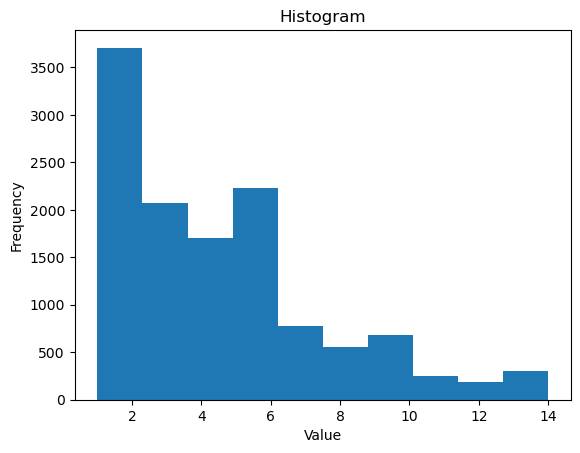

In [24]:
#checking the distribution
#it is right skewed
import matplotlib.pyplot as plt
plt.hist(df['time_in_hospital'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

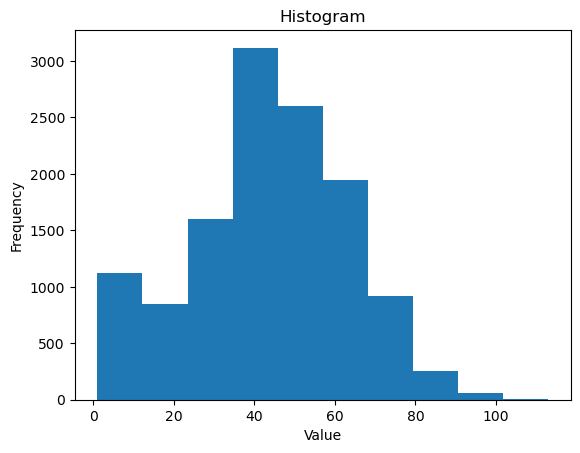

In [25]:
#slight normal distribution
plt.hist(df['n_lab_procedures'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

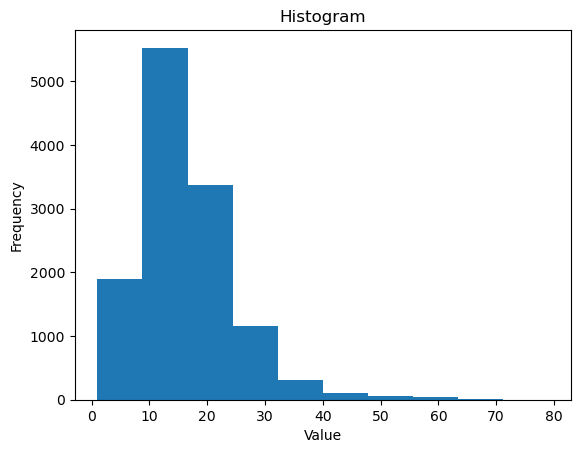

In [26]:
#right skewed distribution depicted by n_medications
plt.hist(df['n_medications'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

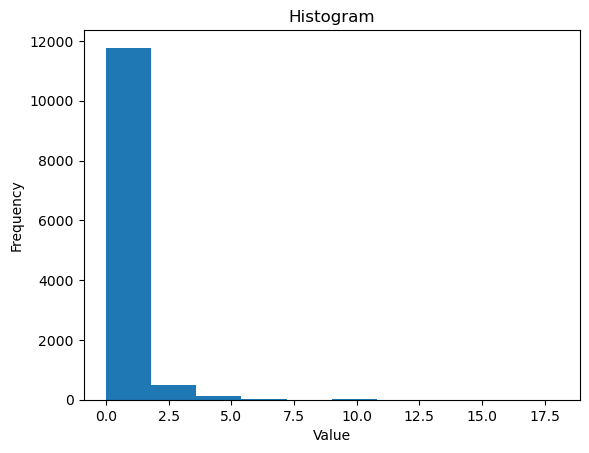

In [27]:
#extremely right skewed distribution
plt.hist(df['n_outpatient'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

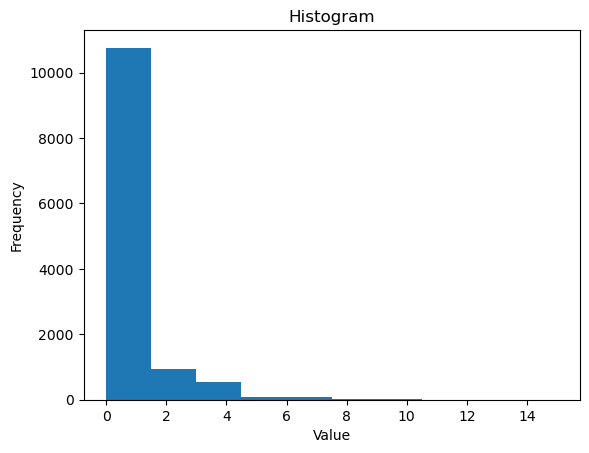

In [28]:
#extremely right skewed distribution
plt.hist(df['n_inpatient'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [24]:
#separating target and feature
x = df.drop('readmitted',axis=1)
y = df['readmitted']

In [31]:
#identifying categorical and numerical variables
categorical_cols = x.select_dtypes(include=['object']).columns
numerical_cols = x.select_dtypes(include=[np.number]).columns

In [32]:
# Preprocessing pipelines for numerical and categorical data

#fills missing values of numerical columns with median value of each column
numerical_transformer = SimpleImputer(strategy='median')

#fills missing values of categorical columns with most frequent category and converts categorical into numerical form using one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [33]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [34]:
# Create the logistic regression model
#create a pipeline
#pipeline simplifies the process and ensures same preprocessing and modeling is applied to both training and testing
#this pipeline does two things
#preprocessing -> handling missing values and encoding categorical variables
#applying logistic regression with max iterations 1000 to converge 
logisticmodel = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [35]:
# Split the data into training and testing sets
#80 percent is training while 20 percent is test 
#random state is 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
# Train the model
try:
    logisticmodel.fit(x_train, y_train)
    print("Model fitting was successful.")
except Exception as e:
    print("Error during model fitting:", e)

Model fitting was successful.


In [38]:
# Make predictions
try:
    predictions = logisticmodel.predict(x_test)
    print("Predictions were successful.")
except Exception as e:
    print("Error during prediction:", e)

Predictions were successful.


In [39]:
#model predicts 62% accuracy score when it comes to hospital readmission
print('\naccuracy score:')
accuracy_score(y_test,predictions)


accuracy score:


0.6125150421179302

In [40]:

print('\n confusion matrix')
print(confusion_matrix(y_test,predictions))


 confusion matrix
[[1142  211]
 [ 755  385]]


In [41]:
#model achieves 65 percent precision 
#1140(support) actual occurences of readmission in the dataset
#f1 score .44 and recall score .34 quite low
#overall moderately accurate model
#suggests new model implementation

print('\n classification report')
print(classification_report(y_test,predictions))


 classification report
              precision    recall  f1-score   support

          no       0.60      0.84      0.70      1353
         yes       0.65      0.34      0.44      1140

    accuracy                           0.61      2493
   macro avg       0.62      0.59      0.57      2493
weighted avg       0.62      0.61      0.58      2493



In [42]:
# Assuming X and y are your features and target variables
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of training data:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nShapes of testing data:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Shapes of training data:
X_train: (9972, 16)
y_train: (9972,)

Shapes of testing data:
X_test: (2493, 16)
y_test: (2493,)


In [51]:
import matplotlib.pyplot as plt

In [43]:
#Machine Learning model 2
#KNN model
from sklearn.neighbors import KNeighborsClassifier

In [44]:
from sklearn.preprocessing import StandardScaler

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the KNN model
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # Example with 5 neighbors
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
predictions = knn_model.predict(X_test)

In [46]:
try:
    knn_model.fit(x_train, y_train)
    print("Model fitting was successful.")
except Exception as e:
    print("Error during model fitting:", e)

Model fitting was successful.


In [47]:
print('\naccuracy score:')
accuracy_score(y_test,predictions)


accuracy score:


0.5643802647412756

In [48]:

print('\n confusion matrix')
print(confusion_matrix(y_test,predictions))


 confusion matrix
[[914 439]
 [647 493]]


In [49]:
print('\n classification report')
print(classification_report(y_test,predictions))


 classification report
              precision    recall  f1-score   support

          no       0.59      0.68      0.63      1353
         yes       0.53      0.43      0.48      1140

    accuracy                           0.56      2493
   macro avg       0.56      0.55      0.55      2493
weighted avg       0.56      0.56      0.56      2493

